In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

- 처음~2020.4월 : 거리두기 시작
- 2020.5월 : 생활방역 전환
- 2020.6월~8월 : 수도권 2단계
- 2020.9월 : 2.5단계 강화
- ~~2020.9월 : 거리두기 2단계로 하향~~
- 2020.10월 : 1단계 하향
- 2020.11월 : 정밀방역으로 세분화
- 2020.12월 : 2단계 시행
- ~~2020.12월 : 2.5단계 시행~~

+ 2021.1월~2월 : 2.5단계, 조치 완화
+ ~~2021.2월 : 2단계 완화~~
+ 2021.3월~6월 : 거리두기 개편
+ 2021.07월 거리두기 4단계

- 2022.8월~4월?? : 거리두기 해제?

In [3]:
with open("../참고 데이터/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata

,소분류,읍면동
0,1101053,사직동
1,1101054,삼청동
2,1101055,부암동
3,1101056,평창동
4,1101057,무악동
...,...,...
410,1125070,둔촌1동
411,1125071,둔촌2동
412,1125072,암사1동
413,1125073,천호2동


In [4]:
# 2020년 4월까지
from os import listdir
import pandas as pd

filenames0 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202001/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202001/")]
filenames1 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/")]
# filenames2 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/")]
# filenames3 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/")]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1], 
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1]
data = pd.concat(yo, 
                ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# print([pd.read_csv(f,encoding='cp949') for f in filenames])
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2point5)
data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']


18971023
도착 시군구 코드
금천구     13139560
도봉구     14835990
양천구     15512020
강북구     16664560
중랑구     16956860
구로구     17022480
은평구     17284240
강동구     17901650
광진구     17907230
동작구     17995940
용산구     18025030
서대문구    18043450
성동구     18342290
관악구     18970870
동대문구    19033120
종로구     19383750
성북구     19395800
노원구     19531770
강서구     19687360
영등포구    19713470
중구      19946090
마포구     20508920
서초구     21769560
송파구     21846830
강남구     24759360
Name: 평균 이동 시간(분), dtype: int64


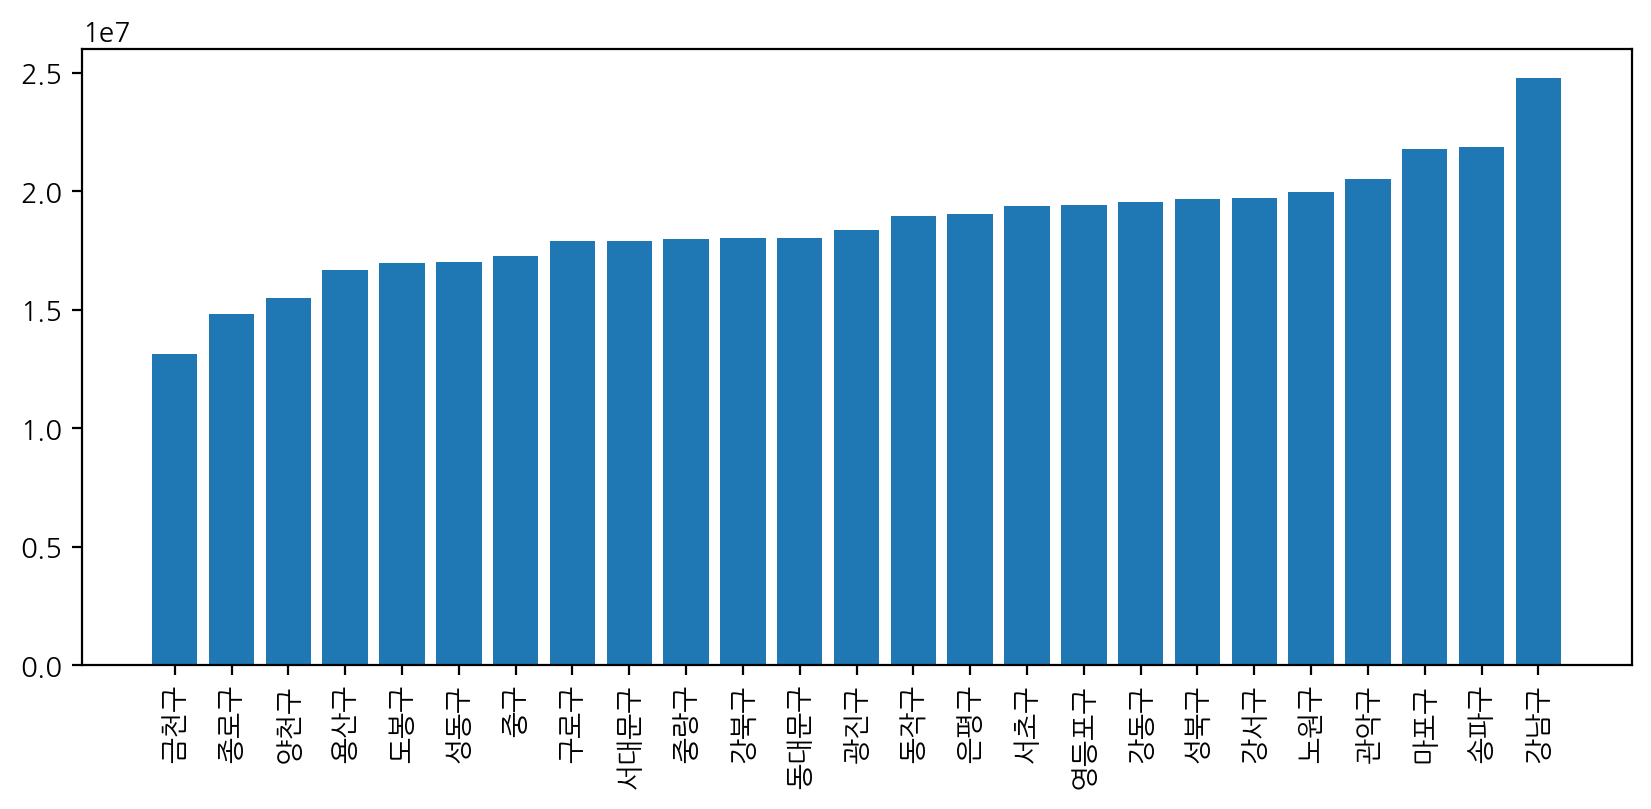

In [5]:
plt.figure(figsize=(10,4))
plt.bar(regions, data2point5)
plt.xticks(range(25), regions, rotation=90)
# plt.savefig("../작업 결과물/소중한 그래프(2021년 1월 도착인구 뭉탱이).png", dpi=96)
plt.show()

In [ ]:
# 2020년 6월에서 8월까지

In [ ]:
# 2021년 1월에서 2월까지

In [ ]:
# 2021년 3월에서 6월까지